In [2]:
import sys, cv2
import numpy as np
import tracktor_revised as tr
import matplotlib.pyplot as plt
import pickle
import os

In [3]:
# Open video file.
video_file        = '../Data/SF_n1_t4_3012.mp4'
cap               = cv2.VideoCapture(video_file)
n_frames          = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps               = cap.get(cv2.CAP_PROP_FPS)
print(f'{n_frames} frames, {fps} frames per second.')

# Contour detection parameters.
block_size,offset = 15,13
min_area,max_area = 20,1000
n_pix             = 5

54382 frames, 30.0 frames per second.


In [20]:
# List of frames to analyze.
frameID_list = range(5000,50000,500)

# Data structure to hold only the pixels belonging to a fish and their brightness.
fish = []
fish2=[]

for i in frameID_list:
    
    # Load the frame.
    cap.set(cv2.CAP_PROP_POS_FRAMES, i-1)
    ret,frame = cap.read()
    
    # Detect the contours.
    contours  = tr.contour_detect(frame,min_area,max_area,block_size,offset,n_pix)
    
    # Make a mask with value j inside fish number j and -1 elsewhere. 
    mask      = 0*cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) - 1
    for j in range(len(contours)):
        cv2.drawContours(mask, contours, j, j, -1)
    
    # Make and save a list of each fish's pixels.
    pixels=[]
    for j in range(len(contours)):
        pixels=(np.nonzero(mask==j))
        n =len(pixels[0]) # Number of pixels in J
        for k in range(n):
            row=pixels[0][k]
            col=pixels[1][k]
            rgb=frame[row,col]
            grey=round(.3*rgb[0]+.59*rgb[1]+.11*rgb[2],2)
            fish.append([row,col,grey])
        m=len(pixels[1])
        if m>=1:
            for k in range(n):
                row=pixels[0][k]
                col=pixels[1][k]
                rgb=frame[row,col]
                grey=round(.3*rgb[0]+.59*rgb[1]+.11*rgb[2],2)
                fish2.append([row,col,grey])   

with open('fish.pkl','wb') as fh:
     pickle.dump(fish,fh)

In [5]:
with open('fish.pkl','rb') as fh:
     fish=pickle.load(fh)

In [14]:
greyArray=[]
for j in range(len(fish)):
    greyArray.append(fish[j][2])
#print(greyArray)

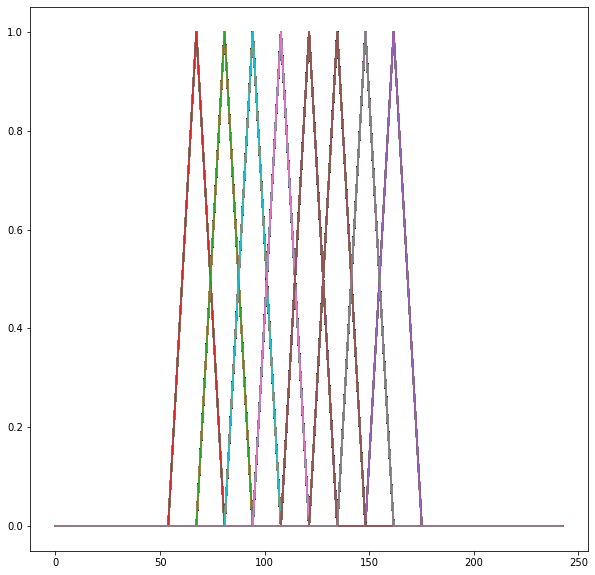

In [16]:
#Creates a list of all the greyscale values of fish.
greyArray=[]
for j in range(len(fish)):
    greyArray.append(fish[j][2])

#Greyscale histogram of all frames
bins=np.linspace(0,256,20)
plt.figure(figsize=(10,10))
for i in range(len(greyArray)):
    histArray=np.histogram(greyArray[i],bins=bins)
    plt.plot(histArray[1][:-1],histArray[0])
plt.show()

### After do 2 fish, make same histogram for both fish, but make each one seperate color.

In [ ]:
#Creates an array of the distance, brightness sum and brightness difference for the frame of greyFish 

pairFrameData=[]
for i in range(len(fish)):
    for j in range(i):
        distance=np.sqrt((fish[i][0]-fish[j][0])**2+(fish[i][1]-fish[j][1])**2)
        brightness=fish[i][2]+fish[j][2]
        difference=np.absolute(fish[i][2]-fish[j][2])
        pairFrameData.append([distance,brightness,difference])
pairFrameData=np.array(pairFrameData).T
print(pairFrameData)

In [ ]:
#Creates a 2d histogram of the first frame of greyFish using sum then difference of brightnesses
histArray=np.histogram(pairFrameData[0])
plt.plot(histArray[1][:-1],histArray[0])
plt.show()

heightValuesSum,bin1Sum,bin2sum=np.histogram2d(pairFrameData[0],pairFrameData[1])
plt.hist2d(pairFrameData[0],pairFrameData[1])
plt.show()

heightValuesDifference,bin1Difference,bin2Difference=np.histogram2d(pairFrameData[0],pairFrameData[2])
plt.hist2d(pairFrameData[0],pairFrameData[2])
plt.show()

In [ ]:
#Creates an array of the distance difference[0], brightness sum[1], and brightness difference[2] for every frame of greyFish
bins=np.linspace(0,500,20)
histDifferenceData=[]
for k in range(len(greyFish)):
    pairsData=[]
    for i in range(greyFish[k].shape[1]):
        for j in range(i):
            distance=np.sqrt((greyFish[k][0][i]-greyFish[k][0][j])**2+(greyFish[k][1][i]-greyFish[k][1][j])**2)
            brightness=greyFish[k][2][i]+greyFish[k][2][j]
            difference=np.absolute(greyFish[k][2][i]-greyFish[k][2][j])
            pairsData.append([distance,brightness,difference])
    pairsData=np.array(pairsData).T
    histDifferenceData.append(np.histogram2d(pairsData[0],pairsData[2],bins=[bin1Difference,bin2Difference]))

In [ ]:
#Calculates the euclidan difference between the first frame of histDifferenceData and every other frame using: the distance in [0], the brightnes sums in [1], and the brightness diffrerence in [2]
twodDifferenceArray=[]
for i in range(len(histDifferenceData)):
    twodDifferenceSubArray=[]
    twodDifferenceSubArray=np.linalg.norm(histDifferenceData[i][0]-histDifferenceData[0][0])
    twodDifferenceArray.append(twodDifferenceSubArray)

In [ ]:
#Plots histogram of distance values
histArray=np.histogram(twodDifferenceArray)
plt.plot(histArray[1][:-1],histArray[0])
plt.show()